**Logisitical Classification **



Dataset Link: https://nces.ed.gov/ccd/files.asp Fiscal year 2017-2018 District Level

Authors: Sarah Mueller, Alberto Veloso, Grant Ball

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression


# Data Reading and Preparation 

**Data Preperation**<br>In this section we simply load in our data to our dataframe, remove NaN values (or -2 in this case), and then create a new column we will predict against.

In [2]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df = pd.read_csv('sdf18_1a.txt',sep="\t") # load UCD school data into data frame

df.drop(df.columns.difference(['STNAME','TOTALREV', 'TFEDREV', 'TLOCREV', 'Z32', 'V93', 'C10', 'TSTREV', 'Z34', 'K10']), 1, inplace=True)# This syntax grabs ONLY the columns listed; ignore many less pertinent pieces of data.

df.rename(columns={'STNAME':'State'}, inplace = True)
df.rename(columns={'TLOCREV':'Total Local Revenue'}, inplace = True)
df.rename(columns={'TFEDREV':'Total Fed Rev'}, inplace = True)
df.rename(columns={'TOTALREV':'Total Rev (=state+local+fed)'}, inplace = True)
df.rename(columns={'Z32':'Total salaries'}, inplace = True)
df.rename(columns={'V93':'Textbook Costs'}, inplace = True)
df.rename(columns={'C10':'STATE REVENUE - SCHOOL LUNCH PROGRAMS'}, inplace = True)
df.rename(columns={'TSTREV':'Total State Revenue'}, inplace = True)
df.rename(columns={'Z34':'Total employee benefits'}, inplace = True)
df.rename(columns={'TOTALEXP':'Total expenditures'}, inplace = True)
df.rename(columns={'K10':'CAPITAL OUTLAY - OTHER EQUIPMENT'}, inplace = True)

#drop all not texas
df = df[df.State == 'Texas']

df =df.replace(-2, 0) # -2 means the data 'isn't applicable' so let's make it 0


df['RR (Revenue Ranking)'] = df['Total State Revenue'].apply(lambda x:'0' if x in range(0,8216000	) else '1')

df.head(n=15) # lets manually investigate the data and ensure it's okay!

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,State,Total Rev (=state+local+fed),Total Fed Rev,Total State Revenue,STATE REVENUE - SCHOOL LUNCH PROGRAMS,Total Local Revenue,CAPITAL OUTLAY - OTHER EQUIPMENT,Total salaries,Total employee benefits,Textbook Costs,RR (Revenue Ranking)
15806,Texas,7486000,612000,3374000,5000,3500000,423000,2770000,532000,3000,0
15807,Texas,4761000,228000,2120000,1000,2413000,79000,2131000,299000,11000,0
15808,Texas,4535000,304000,759000,1000,3472000,146000,1907000,358000,11000,0
15809,Texas,5998000,909000,2570000,0,2519000,0,3914000,325000,0,0
15810,Texas,8561000,24000,2162000,6000,6375000,68000,2054000,334000,21000,0
15811,Texas,3457000,128000,978000,0,2351000,9000,1610000,251000,5000,0
15812,Texas,2432000,178000,833000,1000,1421000,0,1259000,234000,8000,0
15813,Texas,81785000,1982000,7216000,6000,72587000,1252000,38327000,6156000,447000,0
15814,Texas,29440000,1339000,2552000,4000,25549000,82000,14976000,2493000,27000,0
15815,Texas,215066000,13149000,88317000,46000,113600000,1767000,123348000,21479000,718000,1


**Test & Train data preperation**<br>
In this section we grab the values and split the data into test and train for later prediction.

In [3]:
df.drop(columns='State', inplace=True) # we are done analyzing state. they are all texas- let's remove that now-useless info.

y = df['RR (Revenue Ranking)'].values
df.drop(columns='RR (Revenue Ranking)', inplace=True)
x = df.values
x.shape, y.shape

# test_size == porportion of data in the test split. we Discussed in lecture .2 is a good 80-20 split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state=1)

**Model Fitting and Prediction**<br>
In this section we grab grab our prediction from the independant feature as well fitting and obtaining a score..

In [4]:
clf = LogisticRegression()
clf.fit(xtrain,ytrain)
clf.score(xtrain,ytrain), clf.score(xtest,ytest)
ypred = clf.predict(xtest)


**Data Examination Part 2**<br>
In this section we further examine the data via a Confusion Matrix. The goal of this is to simply get a visual representation of our model's accuracy; valued by the numbers and color below- a low # representing low accuracy.

<Figure size 432x288 with 0 Axes>

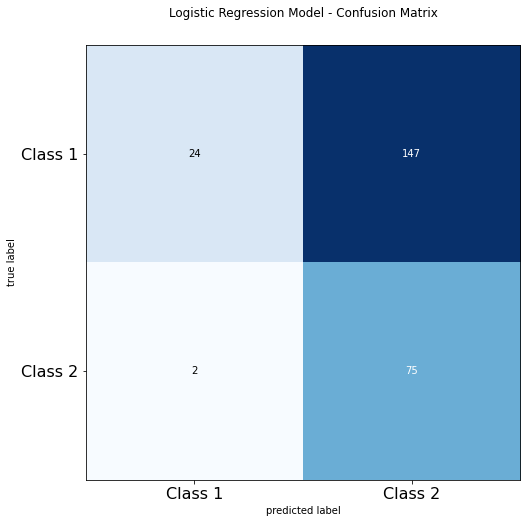

In [5]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(ytest, ypred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Logistic Regression Model - Confusion Matrix")
plt.xticks(range(2), ["Class 1","Class 2"], fontsize=16)
plt.yticks(range(2), ["Class 1","Class 2"], fontsize=16)
plt.show()

**Data Examination Part 3**<br>
In this section we further examine the data via a Pair Plot. The goal of this is to get a visual representation of how much the various features mean- for instance we can that federal revenue plays a huge positive correlation with total revenue (of course) but can make deeper analysis, for instance that teacher salary plays an almost equally significant role to revenue. Additionally we examine the score of the cross validation to get a better look at how our model performed.

<Figure size 288x288 with 0 Axes>

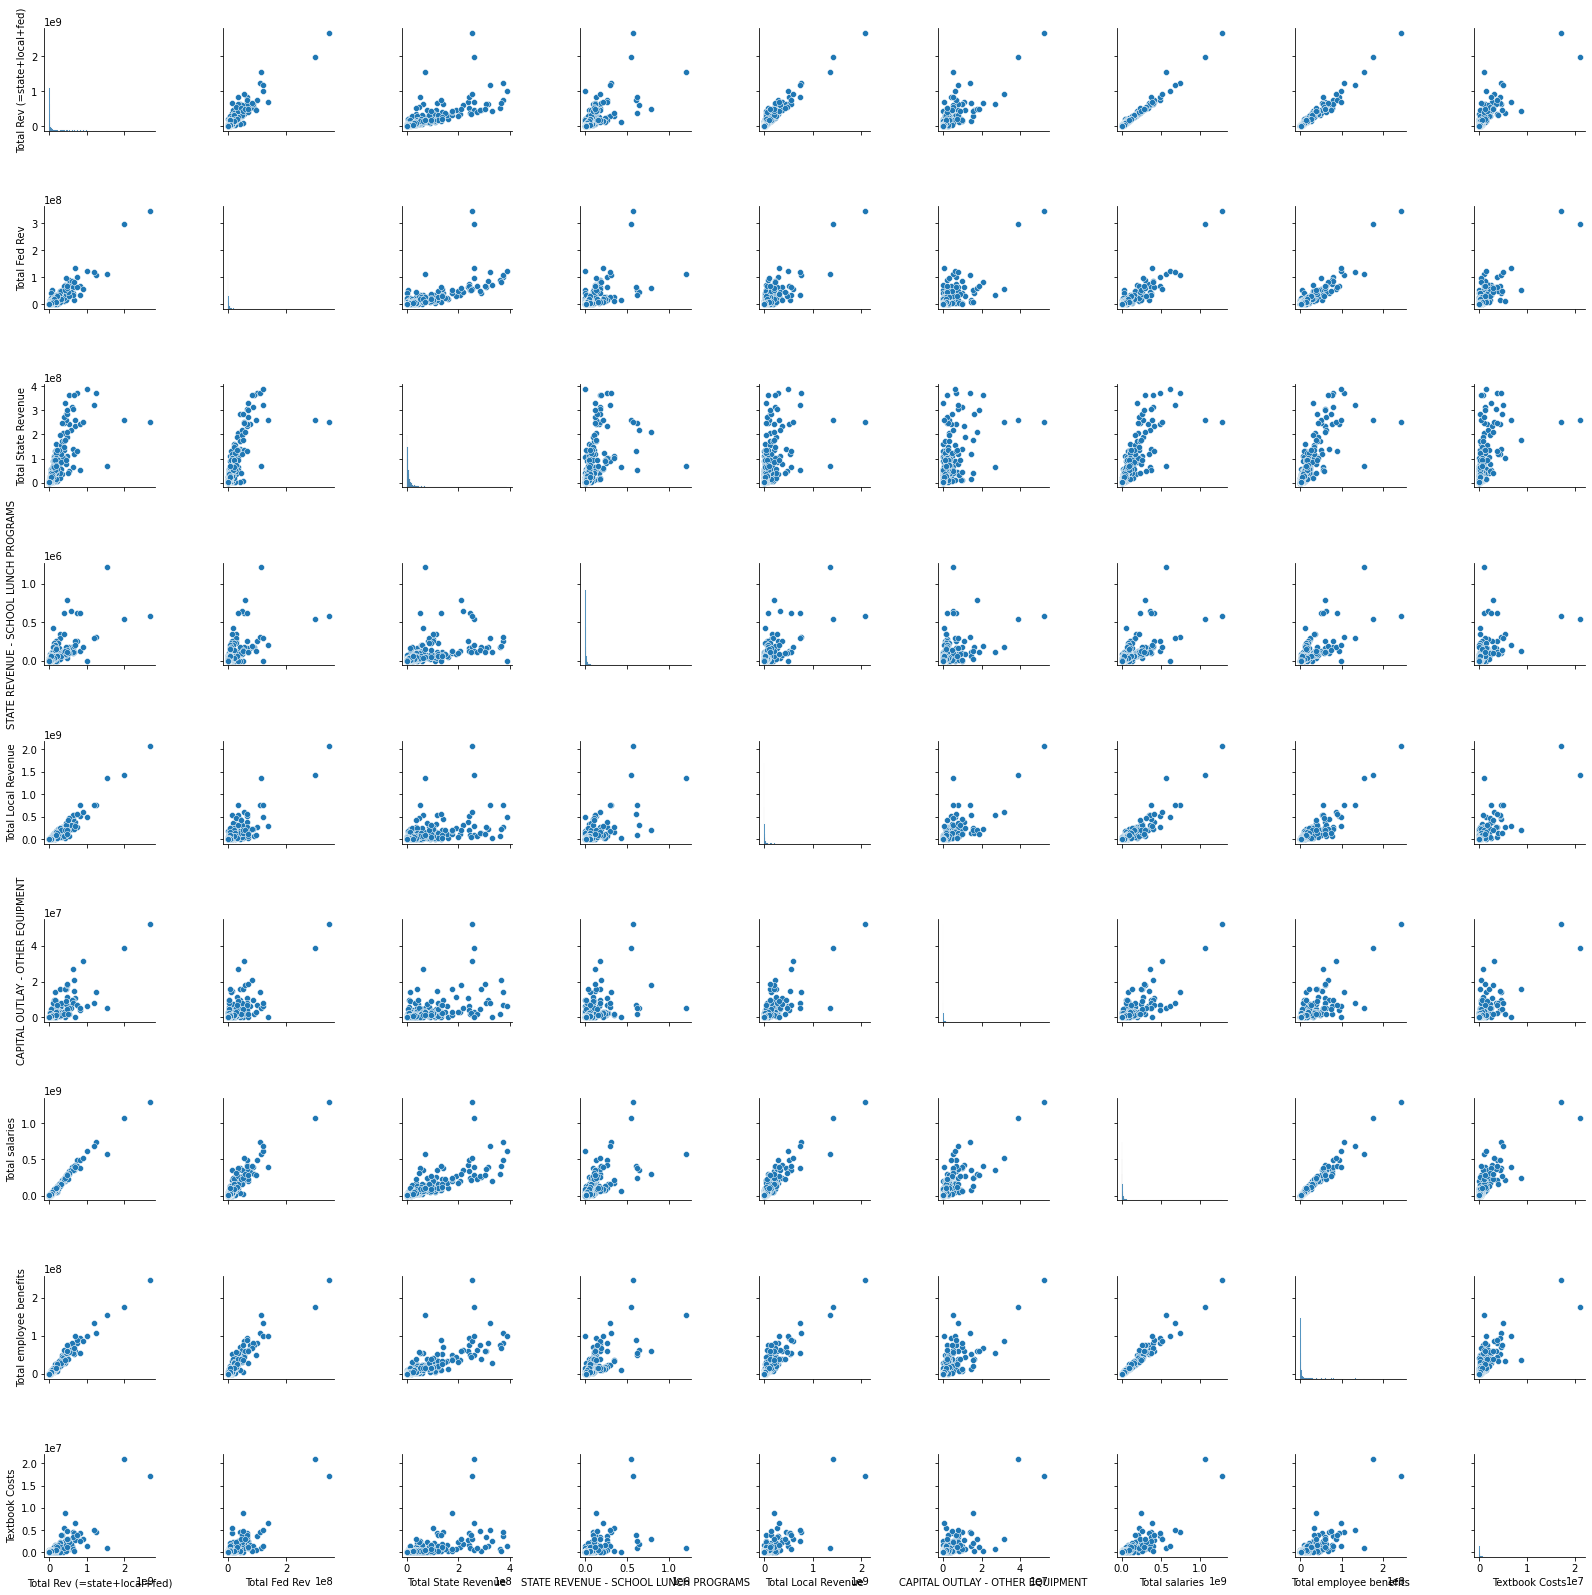

In [7]:
scores_log=cross_val_score(clf, xtrain, ytrain)
print(scores_log)

plt.figure(figsize=(4,4))
sns.pairplot(df)